# Fig.1 - Single- and Double-Resistant Genotype Trends (w/ 3x2 subpanels)

Change plot's default size and font

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
rc = {"font.family" : "serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

You need to define these variables each run to reflect certain drug coverage settings.

In [2]:
# where computed three IQR files are stored
IQR_filpath = 'IQR_data/set7ac_%s'
# where parsed 100 simulation outputs are stored
parsed_filepath = 'parsed_data/set7_ac/monthly_%s.txt'
# filepath to save the output plot to
plot_savepath = 'generated_figures/set7_ac_fig1.svg'

Read in UQ, Median, and LQ data as df

In [3]:
import pandas as pd
L_IQRdf = pd.read_csv(IQR_filpath % 'L.csv')
M_IQRdf = pd.read_csv(IQR_filpath % 'M.csv')
U_IQRdf = pd.read_csv(IQR_filpath % 'U.csv')

Read in the first 10 simulations as df to show variations

In [4]:
dflist = []
for i in range(1,101):
  filepath = parsed_filepath % i
  dflist.append(pd.read_csv(filepath, index_col=False, sep='\t'))

Plot

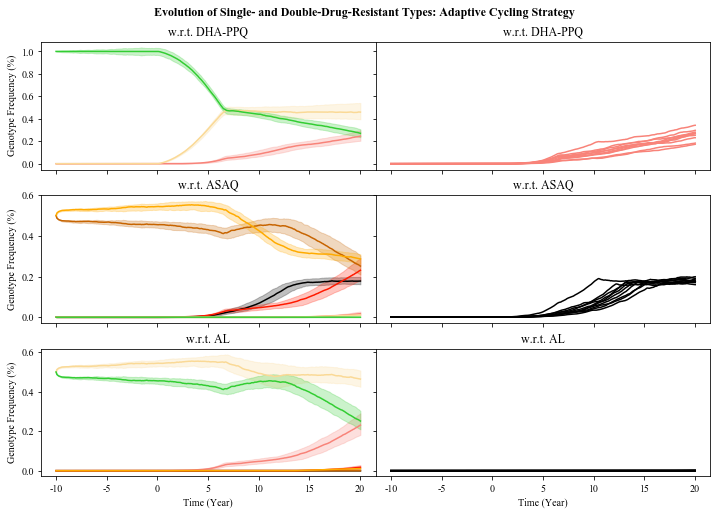

In [5]:
# prepare plt for 5x3 subpanels
from plot_helper import xaxis_label_ticker
from plotter import fig1_plot_IQR, fig1_plot_ten_vars
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0})
fig.patch.set_facecolor('white')
fig.suptitle('Evolution of Single- and Double-Drug-Resistant Types: Adaptive Cycling Strategy', y=0.94, fontweight='bold')

(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

fig1_plot_IQR(ax1, L_IQRdf, M_IQRdf, U_IQRdf, 'DHA-PPQ')
fig1_plot_ten_vars(ax2, dflist, 'DHA-PPQ')
fig1_plot_IQR(ax3, L_IQRdf, M_IQRdf, U_IQRdf, 'ASAQ')
fig1_plot_ten_vars(ax4, dflist, 'ASAQ')
fig1_plot_IQR(ax5, L_IQRdf, M_IQRdf, U_IQRdf, 'AL')
fig1_plot_ten_vars(ax6, dflist, 'AL')

ax1.set_title('w.r.t. DHA-PPQ')
ax2.set_title('w.r.t. DHA-PPQ')
ax3.set_title('w.r.t. ASAQ')
ax4.set_title('w.r.t. ASAQ')
ax5.set_title('w.r.t. AL')
ax6.set_title('w.r.t. AL')

ax5.set_xlabel('Time (Year)')
ax6.set_xlabel('Time (Year)')
ax1.set_ylabel('Genotype Frequency (%)')
ax3.set_ylabel('Genotype Frequency (%)')
ax5.set_ylabel('Genotype Frequency (%)')

ax5.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax5.xaxis.set_major_formatter(ticks_x)
ax6.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax6.xaxis.set_major_formatter(ticks_x)

plt.savefig(fname=plot_savepath, format='svg')
plt.show()